In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
nwine=pd.read_csv('winenew.csv')


In [57]:
nwine.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [58]:
nwine.tail()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [71]:
nwine['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [72]:
nwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [73]:
X=nwine.iloc[:,:-1]
X.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [74]:
y = nwine.iloc[:,-1]
y.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [75]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [76]:
X[0:4]

array([[-1.73096794, -0.52835961,  0.96187667, -1.39147228, -0.45321841,
        -0.24370669, -0.46619252, -0.37913269,  0.55827446,  1.28864292,
        -0.57920652, -0.96024611],
       [-1.72880152, -0.29854743,  1.96744245, -1.39147228,  0.04341614,
         0.2238752 ,  0.87263823,  0.62436323,  0.02826077, -0.7199333 ,
         0.1289504 , -0.58477711],
       [-1.7266351 , -0.29854743,  1.29706527, -1.18607043, -0.16942723,
         0.09635286, -0.08366945,  0.22904665,  0.13426351, -0.33117661,
        -0.04808883, -0.58477711],
       [-1.72446868,  1.65485608, -1.38444349,  1.4841536 , -0.45321841,
        -0.26496041,  0.10759209,  0.41150046,  0.6642772 , -0.97910442,
        -0.46118037, -0.58477711]])

In [77]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [78]:
y_test.shape

(480,)

In [79]:
#Training and Predicting
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [80]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.7375

In [81]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[160,  70],
       [ 56, 194]], dtype=int64)

In [82]:
cm1 = pd.DataFrame(data=cm,index=['1','2'],columns=['1','2'])
cm1

,1,2
1,160,70
2,56,194


In [83]:
prediction_output =pd.DataFrame(data=[y_test.values,ypredict],index=['y_test','ypredict'])

In [84]:
prediction_output.transpose()

,y_test,ypredict
0,bad,good
1,good,bad
2,good,good
3,good,bad
4,good,good
...,...,...
475,good,good
476,good,good
477,bad,bad
478,good,good


In [85]:
ks = 21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [86]:
print(mean_acc)

[0.75208333 0.70208333 0.7375     0.72291667 0.72291667 0.70416667
 0.74166667 0.72916667 0.71875    0.71875    0.71041667 0.70208333
 0.70416667 0.70208333 0.71875    0.71875    0.73541667 0.73958333
 0.72083333 0.7375    ]


In [87]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.7520833333333333 with k= 1


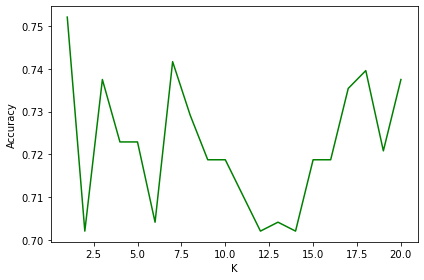

In [88]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()